In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

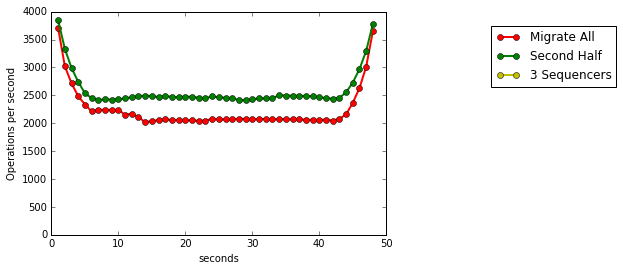

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

s = sum_throughput(glob.glob("proxy-half-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='o', linewidth=2.0, label="Migrate All")

s = sum_throughput(glob.glob("proxy-half2-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'g-', marker='o', linewidth=2.0, label="Second Half")

s = sum_throughput(glob.glob("../results/"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'y-', marker='o', linewidth=2.0, label="3 Sequencers")

#s = sum_throughput(glob.glob("4seq-baseline-issdm-*throughput.csv"))
#ax.plot(range(0, len(s['rate'])), s['rate'], 
#        'y-', marker='o', linewidth=2.0, label="4 Sequencers")

#s = sum_throughput(glob.glob("5seq-baseline-issdm-*throughput.csv"))
#ax.plot(range(0, len(s['rate'])), s['rate'], 
#        'y-', marker='o', linewidth=2.0, label="5 Sequencers")

#s = sum_throughput(glob.glob("6seq-baseline-issdm-*throughput.csv"))
#ax.plot(range(0, len(s['rate'])), s['rate'], 
#        'y-', marker='o', linewidth=2.0, label="6 Sequencers")

ax.set_ylim(0, 4000)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))